In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import Danych z Filmwebu

In [2]:
data_path='https://raw.githubusercontent.com/mateuszrusin/ml-filmweb-score/master/oceny.csv'
marks = pd.read_csv(data_path)
marks.head(10)

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data
0,810167,Joker,NaN,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6
2,753119,Prosta historia o morderstwie,NaN,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5
3,797600,"Ciemno, prawie noc",NaN,2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4
5,825221,W cieniu księżyca,In the Shadow of the Moon,2019,NaN,5,NaN,USA,"Thriller, Sci-Fi",2019-10-2
6,830386,The Wolf Hour,NaN,2019,NaN,4,NaN,"USA, Wielka Brytania",Thriller,2019-10-2
7,824402,Ma,NaN,2019,NaN,4,NaN,USA,Horror,2019-9-30
8,838822,Between Two Ferns: Film,Between Two Ferns: The Movie,2019,NaN,6,NaN,USA,Komedia,2019-9-24
9,807159,Słodki koniec dnia,NaN,2019,NaN,5,NaN,Polska,Dramat,2019-9-24


Scalamy tytuł oryginalny z polskim

In [3]:
marks['Tytuł oryginalny']=marks['Tytuł oryginalny'].fillna(marks['Tytuł polski']);
marks.head(10)

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6
2,753119,Prosta historia o morderstwie,Prosta historia o morderstwie,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5
3,797600,"Ciemno, prawie noc","Ciemno, prawie noc",2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4
5,825221,W cieniu księżyca,In the Shadow of the Moon,2019,NaN,5,NaN,USA,"Thriller, Sci-Fi",2019-10-2
6,830386,The Wolf Hour,The Wolf Hour,2019,NaN,4,NaN,"USA, Wielka Brytania",Thriller,2019-10-2
7,824402,Ma,Ma,2019,NaN,4,NaN,USA,Horror,2019-9-30
8,838822,Between Two Ferns: Film,Between Two Ferns: The Movie,2019,NaN,6,NaN,USA,Komedia,2019-9-24
9,807159,Słodki koniec dnia,Słodki koniec dnia,2019,NaN,5,NaN,Polska,Dramat,2019-9-24


Tworzenie funkcji, która wybiera pierwszy kraj produkcji/nagrywania do dalszej analizy. 
Hipotezą jest sprawdzenie czy jeżeli krajem produkcji są Stany Zjednoczone to użytkownik wyżej je ocenia


In [4]:
def firstValue(x, new_column, split_column, delimiter=','):
    x[new_column]=[ y[0:y.find(delimiter)]  if y.find(delimiter)>0 else y for y in x[split_column] ]
    
    
firstValue(marks, 'firstCountry', 'Kraj produkcji')
marks.head()
    

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,firstCountry
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Kanada
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6,USA
2,753119,Prosta historia o morderstwie,Prosta historia o morderstwie,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5,Polska
3,797600,"Ciemno, prawie noc","Ciemno, prawie noc",2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5,Polska
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4,USA


<b>Tworzenie lambda funkcji, która będzie tworzyć label. Plus konwersja typu danych</b>


In [5]:

converter = lambda x:  1 if x == 'USA'  else  0

In [6]:
marks.dtypes

ID                    int64
Tytuł polski         object
Tytuł oryginalny     object
Rok produkcji         int64
Ulubione             object
Ocena                object
Komentarz           float64
Kraj produkcji       object
Gatunek              object
Data                 object
firstCountry         object
dtype: object

In [7]:
marks_Oceny=marks[marks['Ocena']!='brak oceny']
marks_Oceny['Ocena']=marks_Oceny['Ocena'].astype(int)

/home/krzysztof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:

marks_Oceny['isUSA']= marks_Oceny['firstCountry'].apply(converter)
marks_Oceny.head()

/home/krzysztof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,firstCountry,isUSA
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA","Dramat, Kryminał, Akcja",2019-10-11,Kanada,0
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,"Biograficzny, Kryminał, Thriller",2019-10-6,USA,1
2,753119,Prosta historia o morderstwie,Prosta historia o morderstwie,2016,NaN,3,NaN,Polska,"Kryminał, Thriller",2019-10-5,Polska,0
3,797600,"Ciemno, prawie noc","Ciemno, prawie noc",2019,NaN,2,NaN,Polska,"Kryminał, Thriller",2019-10-5,Polska,0
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,Komedia rom.,2019-10-4,USA,1


In [9]:
country_dict= lambda x: 'USA' if x == 1 else 'Other'

<b>Piewrszy wykres</b> <br>
Sprawdzamy rozkład ocen dla IsUSA za pomocą barplot

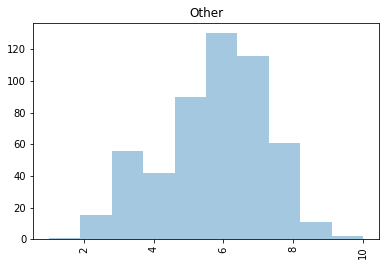

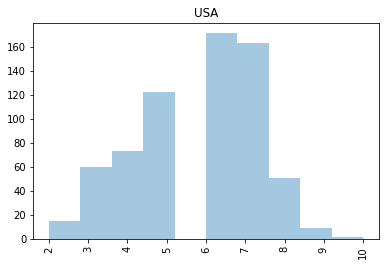

In [10]:
a = marks_Oceny[['isUSA','Ocena']].groupby('isUSA').hist(alpha=0.4,by=marks_Oceny.isUSA.apply(country_dict))

Sprawdzamy rozkład zmiennej Oceny


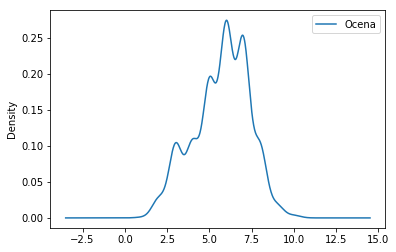

In [11]:
marks_Oceny[['Ocena','isUSA']].plot(x='isUSA', y='Ocena', kind='kde', sharex=True, sharey=True)

In [12]:
a=marks_Oceny[['Ocena','isUSA']].groupby('isUSA').mean()
a.Ocena.at[1]

5.687687687687688

Wykres barplot dla porówania rozkładów. Ten Tutaj po niżej nie jest dobry, ponieważ nie sumuje się do 1 <br>
Nadal można wnioskować, że rozkłady są do siebie zbliżone

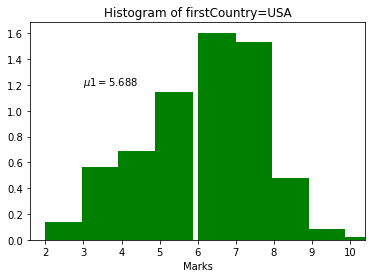

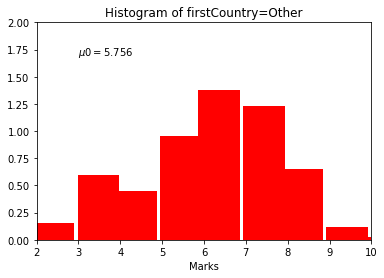

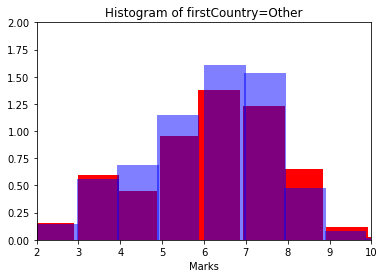

In [13]:

plt.hist(marks_Oceny[marks_Oceny.isUSA==1]['Ocena'], 50, density=1, facecolor='g', alpha=1,width=1.0)

plt.xlabel('Marks')
plt.title('Histogram of firstCountry=USA')
plt.text(3,1.2, r'$\mu1=%s$' % a.Ocena.at[1].round(3))


plt.show()
plt.xlabel('Marks')
plt.title('Histogram of firstCountry=Other')
plt.hist(marks_Oceny[marks_Oceny.isUSA==0]['Ocena'], 50, density=1, facecolor='r', alpha=1,width=1.0)
plt.text(3,1.7, r'$\mu0=%s$' % a.Ocena.at[0].round(3))
plt.axis([2, 10, 0, 2])
plt.show()
plt.xlabel('Marks')
plt.title('Histogram of firstCountry=Other')
plt.hist(marks_Oceny[marks_Oceny.isUSA==0]['Ocena'], 50, density=1, facecolor='r', alpha=1,width=1.0)
plt.hist(marks_Oceny[marks_Oceny.isUSA==1]['Ocena'], 50, density=1, facecolor='b', alpha=0.5,width=1.0)

plt.axis([2, 10, 0, 2])
plt.show()

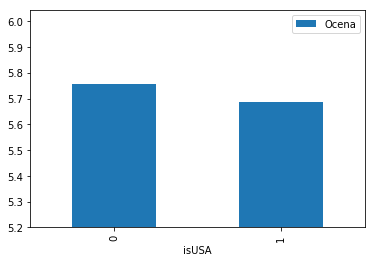

In [14]:
marks_Oceny[['Ocena', 'isUSA']].groupby('isUSA').mean().plot(kind='bar', legend=True, ylim=5.2)

In [15]:
marks_Oceny.Gatunek.groupby(marks_Oceny.Gatunek).agg('count')

Gatunek
Akcja                                                19
Akcja, Komedia kryminalna                             3
Akcja, Sci-Fi                                        58
Animacja, Dramat                                      1
Animacja, Dramat, Komedia                             1
Animacja, Dramat, Sci-Fi                              1
Animacja, Familijny, Akcja                            1
Animacja, Familijny, Komedia                          1
Animacja, Familijny, Przygodowy                       1
Animacja, Komedia                                     1
Animacja, Komedia, Przygodowy                         1
Animacja, Przygodowy                                  1
Animacja, Thriller, Romans                            1
Animacja, Thriller, Sci-Fi                            1
Biograficzny                                          1
Biograficzny, Dokumentalny, Muzyczny                  1
Biograficzny, Dramat                                 24
Biograficzny, Dramat historyczny        

Wybranie pierwszego gatunku filmowego do dalszych analiz

In [16]:
firstValue(marks_Oceny,'firstGenrePL', 'Gatunek')
marks_Oceny[marks_Oceny.Gatunek=='Czarna komedia']

/home/krzysztof/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Gatunek,Data,firstCountry,isUSA,firstGenrePL
492,689545,Dzikie historie,Relatos salvajes,2014,NaN,7,NaN,"Argentyna, Hiszpania",Czarna komedia,2015-7-8,Argentyna,0,Czarna komedia
721,378102,Zęby,Teeth,2007,NaN,7,NaN,USA,Czarna komedia,2013-9-26,USA,1,Czarna komedia
760,641987,Turyści,Sightseers,2012,NaN,3,NaN,Wielka Brytania,Czarna komedia,2013-7-20,Wielka Brytania,0,Czarna komedia
788,610144,Życie to jest to,La Chispa de la vida,2011,NaN,6,NaN,"Francja, Hiszpania, USA",Czarna komedia,2013-5-14,Francja,0,Czarna komedia
831,530650,Porąbani,Tucker and Dale vs. Evil,2010,NaN,8,NaN,"Indie, Kanada, USA, Wielka Brytania",Czarna komedia,2013-1-16,Indie,0,Czarna komedia


In [17]:
countGenre=marks_Oceny.firstGenrePL.groupby(marks_Oceny.firstGenrePL).agg('count')
countGenre.index

Index(['Akcja', 'Animacja', 'Biograficzny', 'Czarna komedia', 'Dramat',
       'Dramat historyczny', 'Dramat obyczajowy', 'Dramat sądowy', 'Erotyczny',
       'Familijny', 'Fantasy', 'Gangsterski', 'Horror', 'Katastroficzny',
       'Komedia', 'Komedia kryminalna', 'Komedia obycz.', 'Komedia rom.',
       'Kostiumowy', 'Kryminał', 'Melodramat', 'Obyczajowy', 'Przygodowy',
       'Romans', 'Sci-Fi', 'Sensacyjny', 'Surrealistyczny', 'Thriller',
       'Western', 'Wojenny'],
      dtype='object', name='firstGenrePL')

Wybranie pierwszych 5 najbardziej popularnych gatunków po zmapowaniu

In [18]:
genreMap=pd.DataFrame({'genre':countGenre.index,'value':countGenre.values})
firstFiveGenres=genreMap.sort_values(by='value' ,ascending=False).head()
firstFiveGenres

,genre,value
4,Dramat,432
27,Thriller,208
12,Horror,82
0,Akcja,80
14,Komedia,75


Zaczytanie słownika i łaczenie z naszym zbiorem

In [19]:
genres_map=pd.read_csv('genre.txt', sep=':')
genres_map.head()

,Gatunek,Map
0,Akcja,Action
1,Animacja,Animation
2,Biograficzny,Biography
3,Czarna komedia,Comedy
4,Dramat,Drama


In [74]:
marks_Oceny=marks_Oceny.merge(genres_map,how='left', left_on='firstGenrePL', right_on='Gatunek',  suffixes=('_left','_right') )
marks_Oceny.head()


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,isUSA,firstGenrePL,Map_left,originalTitle,startYear,Gatunek,Map_right
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,0,Dramat,Drama,Joker,2019,Dramat,Drama
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,2019-10-6,USA,1,Biograficzny,Biography,"Extremely Wicked, Shockingly Evil and Vile",2019,Biograficzny,Biography
2,753119,Prosta historia o morderstwie,Prosta historia o morderstwie,2016,NaN,3,NaN,Polska,2019-10-5,Polska,0,Kryminał,Crime,Prosta historia o morderstwie,2016,Kryminał,Crime
3,797600,"Ciemno, prawie noc","Ciemno, prawie noc",2019,NaN,2,NaN,Polska,2019-10-5,Polska,0,Kryminał,Crime,"Ciemno, prawie noc",2019,Kryminał,Crime
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,2019-10-4,USA,1,Komedia rom.,Comedy,Confessions of a Shopaholic,2009,Komedia rom.,Comedy


Stworzenie subsetu z pierwszych 5 najpopularniejszych gatunków

In [22]:
def subsets_create(x, column, by, by_column):
    
    j=1
    for i in by[by_column].index:
        if j ==1 :
            subset=x[x[column]==by.at[i,by_column]]
            j=j+1
        else:
            subset=pd.concat([subset,x[x[column]==by.at[i,by_column]]], ignore_index=True )
    return subset

In [23]:
New_set=subsets_create(marks_Oceny,'firstGenrePL',firstFiveGenres,'genre' )
New_set.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,isUSA,firstGenrePL,Map
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,0,Dramat,Drama
1,807159,Słodki koniec dnia,Słodki koniec dnia,2019,NaN,5,NaN,Polska,2019-9-24,Polska,0,Dramat,Drama
2,774799,Ingrid wyrusza na zachód,Ingrid Goes West,2017,NaN,6,NaN,USA,2019-9-15,USA,1,Dramat,Drama
3,37,Desperatki,Set It Off,1996,NaN,6,NaN,USA,2019-8-24,USA,1,Dramat,Drama
4,88838,Kaliber 45,.45,2006,NaN,3,NaN,USA,2019-8-15,USA,1,Dramat,Drama


Import seaborn i tworzenie wykresów rozkładów

In [24]:
import seaborn as sns

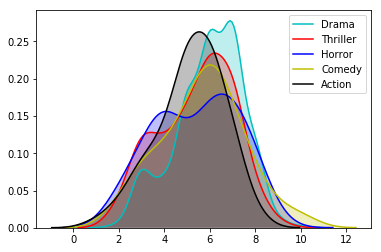

In [25]:

p1=sns.kdeplot(New_set[New_set.Map=='Drama']['Ocena'], shade=True, color='c', label='Drama')
p1=sns.kdeplot(New_set[New_set.Map=='Thriller']['Ocena'], shade=True, color='r', label='Thriller')
p1=sns.kdeplot(New_set[New_set.Map=='Horror']['Ocena'], shade=True, color='b', label='Horror')
p1=sns.kdeplot(New_set[New_set.Map=='Comedy']['Ocena'], shade=True, color='y', label='Comedy')
p1=sns.kdeplot(New_set[New_set.Map=='Action']['Ocena'], shade=True, color='black', label='Action')
#p1=sns.kdeplot(df['sepal_length'], shade=True, color="b")
#sns.plt.show()

Merging with IMDB kod pochodzi z poprzedniego spotkania

In [33]:
import wget
import gzip


In [58]:
!wget https://datasets.imdbws.com/title.basics.tsv.gz
!wget https://datasets.imdbws.com/title.ratings.tsv.gz

--2019-11-11 21:04:08--  https://datasets.imdbws.com/title.basics.tsv.gz
Translacja datasets.imdbws.com (datasets.imdbws.com)... 54.230.229.124, 54.230.229.83, 54.230.229.85, ...
Łączenie się z datasets.imdbws.com (datasets.imdbws.com)|54.230.229.124|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 112447878 (107M) [binary/octet-stream]
Zapis do: `title.basics.tsv.gz.1'

title.basics.tsv.gz 100%[===================>] 107,24M  31,4MB/s    w 3,5s     

2019-11-11 21:04:12 (30,8 MB/s) - zapisano `title.basics.tsv.gz.1' [112447878/112447878]

--2019-11-11 21:04:12--  https://datasets.imdbws.com/title.ratings.tsv.gz
Translacja datasets.imdbws.com (datasets.imdbws.com)... 54.230.229.32, 54.230.229.85, 54.230.229.83, ...
Łączenie się z datasets.imdbws.com (datasets.imdbws.com)|54.230.229.32|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 4888785 (4,7M) [binary/octet-stream]
Zapis do: `title.ratings.tsv.gz.1'

title.ratin

In [59]:
!gzip -d -f title.basics.tsv.gz
!gzip -d -f title.ratings.tsv.gz

In [60]:
imdb_title = pd.read_csv('title.basics.tsv', sep='\t')
imdb_raiting = pd.read_csv('title.ratings.tsv', sep='\t')

/home/krzysztof/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
imdb = pd.merge(imdb_title, imdb_raiting, how='left',on='tconst')

In [62]:
marks_Oceny['originalTitle'] = marks_Oceny['Tytuł oryginalny']
marks_Oceny['startYear'] =marks_Oceny['Rok produkcji'].astype(str)

In [85]:
match = {
   'akcja': 'Action',
    'animacja': 'Animation',
    'biograficzny': 'Biography',
    'czarna komedia': 'Comedy',
    'dramat': 'Drama',
    'dramat historyczny': 'Drama',
    'dramat obyczajowy': 'Drama',
    'dramat sądowy': 'Drama',
    'erotyczny': 'Romance',
    'familijny': 'Family',
    'fantasy': 'Fantasy',
    'gangsterski': 'Crime',
    'horror': 'Horror',
    'katastroficzny': 'Adventure',
    'komedia': 'Comedy',
    'komedia kryminalna': 'Comedy',
    'komedia obycz.': 'Comedy',
    'komedia rom.': 'Comedy',
    'komediarom.': 'Comedy',
    'kostiumowy': 'Kostiumowy',
    'kryminał': 'Crime',
    'melodramat': 'Melodramat',
    'obyczajowy': 'Obyczajowy',
    'przygodowy': 'Adventure',
    'romans': 'Romance',
    'sci-Fi': 'Sci-Fi',
    'sensacyjny': 'Sensacyjny',
    'surrealistyczny': 'Surrealistyczny',
    'thriller': 'Thriller',
    'western': 'Western',
    'wojenny': 'War' 
}

In [86]:

def to_list(textdata):
    return "".join(textdata.lower().split()).split(',')
def change_type(t):
  arr = [match[s.lower()] if s.lower() in match else s.lower() for s in to_list(t)]
  return ", ".join(arr)

marks_Oceny['genre_eng'] = marks_Oceny.apply(lambda x: change_type(x['Gatunek']), axis=1)
marks_Oceny.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,isUSA,firstGenrePL,Map_left,originalTitle,startYear,Gatunek,Map_right,genre_eng
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,0,Dramat,Drama,Joker,2019,Dramat,Drama,Drama
1,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,2019-10-6,USA,1,Biograficzny,Biography,"Extremely Wicked, Shockingly Evil and Vile",2019,Biograficzny,Biography,Biography
2,753119,Prosta historia o morderstwie,Prosta historia o morderstwie,2016,NaN,3,NaN,Polska,2019-10-5,Polska,0,Kryminał,Crime,Prosta historia o morderstwie,2016,Kryminał,Crime,Crime
3,797600,"Ciemno, prawie noc","Ciemno, prawie noc",2019,NaN,2,NaN,Polska,2019-10-5,Polska,0,Kryminał,Crime,"Ciemno, prawie noc",2019,Kryminał,Crime,Crime
4,460220,Wyznania zakupoholiczki,Confessions of a Shopaholic,2009,NaN,3,NaN,USA,2019-10-4,USA,1,Komedia rom.,Comedy,Confessions of a Shopaholic,2009,Komedia rom.,Comedy,Comedy


In [87]:
print(len(imdb))
imdb = imdb.dropna(subset=['startYear','originalTitle'])
imdb = imdb[imdb['titleType']=='movie']
imdb.head()

6300824


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance,5.4,81.0
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport",5.1,308.0
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama",6.1,40.0
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,NaN,NaN
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama",6.1,537.0


In [89]:
oceny_imdb = pd.merge(
    marks_Oceny,
    imdb,
    how='inner',
    on=['startYear','originalTitle'])
print(len(oceny_imdb))
oceny_imdb.head()

1120


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,...,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,Drama,tt10556334,movie,Joker,0,\N,92,Documentary,NaN,NaN
1,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,Drama,tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,440528.0
2,796158,"Podły, okrutny, zły","Extremely Wicked, Shockingly Evil and Vile",2019,NaN,6,NaN,USA,2019-10-6,USA,...,Biography,tt2481498,movie,"Extremely Wicked, Shockingly Evil and Vile",0,\N,110,"Biography,Crime,Drama",6.6,57037.0
3,753119,Prosta historia o morderstwie,Prosta historia o morderstwie,2016,NaN,3,NaN,Polska,2019-10-5,Polska,...,Crime,tt6182864,movie,Prosta historia o morderstwie,0,\N,89,"Crime,Thriller",5.9,228.0
4,797600,"Ciemno, prawie noc","Ciemno, prawie noc",2019,NaN,2,NaN,Polska,2019-10-5,Polska,...,Crime,tt7790894,movie,"Dark, Almost Night",0,\N,114,"Crime,Drama",4.6,279.0


In [90]:
print('Zduplikowane: ', len(oceny_imdb[oceny_imdb.duplicated(subset=['originalTitle'])]))
oceny_imdb[oceny_imdb['originalTitle']=='Joker']

Zduplikowane:  38


,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,...,genre_eng,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,Drama,tt10556334,movie,Joker,0,\N,92,Documentary,NaN,NaN
1,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,Drama,tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,440528.0


In [91]:
def get_similarity(row):    
    text_list_eng = to_list(row['genre_eng'])
    text_list_genres = to_list(row['genres'])

    # product of those lists
    commons = set(text_list_eng) & set(text_list_genres)  
    
    return len(commons)

oceny_imdb['similarity'] = oceny_imdb.apply(get_similarity,axis=1)
oceny_duplicated = oceny_imdb[oceny_imdb.duplicated(subset=['originalTitle'], keep=False)]
oceny_duplicated

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,...,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,similarity
0,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,tt10556334,movie,Joker,0,\N,92,Documentary,NaN,NaN,0
1,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,440528.0,1
26,7967,Na fali,Point Break,1991,NaN,7,NaN,USA,2019-8-8,USA,...,tt0102685,movie,Point Break,0,\N,122,"Action,Crime,Thriller",7.3,143818.0,0
45,785673,Kochanek idealny,Zoe,2018,NaN,4,NaN,USA,2019-5-13,USA,...,tt5969746,movie,Zoe,0,\N,95,Mystery,NaN,NaN,0
46,785673,Kochanek idealny,Zoe,2018,NaN,4,NaN,USA,2019-5-13,USA,...,tt6010628,movie,Zoe,0,\N,104,"Romance,Sci-Fi",6.1,6061.0,1
53,799883,Wakacje,Holiday,2018,NaN,3,NaN,"Dania, Holandia, Szwecja",2019-4-15,Dania,...,tt7328154,movie,Holiday,0,\N,93,"Crime,Drama",5.8,2441.0,1
54,799883,Wakacje,Holiday,2018,NaN,3,NaN,"Dania, Holandia, Szwecja",2019-4-15,Dania,...,tt8864962,movie,Holiday,0,\N,84,Crime,2.0,9.0,0
71,678278,Po wypadku,After,2012,NaN,5,NaN,USA,2019-3-19,USA,...,tt1799508,movie,After,0,\N,90,"Drama,Fantasy,Mystery",5.5,4957.0,0
72,678278,Po wypadku,After,2012,NaN,5,NaN,USA,2019-3-19,USA,...,tt2404163,movie,After,0,\N,83,Romance,6.3,35.0,0
155,782021,Bliźnięta,Gemini,2017,NaN,5,NaN,USA,2018-9-12,USA,...,tt5795086,movie,Gemini,0,\N,93,"Crime,Drama,Mystery",5.4,3836.0,0


In [92]:
top1 = oceny_imdb.groupby(['ID']).apply(lambda x: x.sort_values(["similarity"], ascending = False)).reset_index(drop=True)
oceny_imdb2 = top1.groupby('ID').head(1).copy()

oceny_imdb2[oceny_imdb2['originalTitle']=='Joker']

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,...,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,similarity
1102,810167,Joker,Joker,2019,NaN,7,NaN,"Kanada, USA",2019-10-11,Kanada,...,tt7286456,movie,Joker,0,\N,122,"Crime,Drama,Thriller",8.8,440528.0,1


In [93]:
oceny_imdb2.head()

,ID,Tytuł polski,Tytuł oryginalny,Rok produkcji,Ulubione,Ocena,Komentarz,Kraj produkcji,Data,firstCountry,...,tconst,titleType,primaryTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes,similarity
0,2,Adwokat diabła,The Devil's Advocate,1997,NaN,7,NaN,"Niemcy, USA",2011-8-4,Niemcy,...,tt0118971,movie,The Devil's Advocate,0,\N,144,"Drama,Mystery,Thriller",7.5,308202.0,1
1,37,Desperatki,Set It Off,1996,NaN,6,NaN,USA,2019-8-24,USA,...,tt0117603,movie,Set It Off,0,\N,123,"Action,Crime,Drama",6.9,12894.0,1
2,73,Jackie Brown,Jackie Brown,1997,NaN,6,NaN,USA,2011-10-20,USA,...,tt0119396,movie,Jackie Brown,0,\N,154,"Crime,Drama,Thriller",7.5,293814.0,1
3,74,Joe Black,Meet Joe Black,1998,NaN,3,NaN,USA,2019-1-1,USA,...,tt0119643,movie,Meet Joe Black,0,\N,178,"Drama,Fantasy,Romance",7.2,199628.0,1
4,122,Morderstwo doskonałe,A Perfect Murder,1998,NaN,8,NaN,USA,2011-10-22,USA,...,tt0120787,movie,A Perfect Murder,0,\N,107,"Crime,Drama,Thriller",6.5,74641.0,1


Koniec kodu z poprzedniego Spotkania

Wykresy wiolinowe dla Oceny i średniej. Służą do porównania rozkładów w zależności od Grupy.
Zawiera takie informacje jak Min, Max, Mediana i Kwartyle

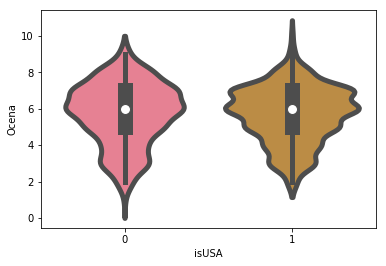

In [116]:
p1=sns.violinplot(x=oceny_imdb2['isUSA'], y=oceny_imdb2['Ocena'], palette=sns.color_palette("husl", 8) ,linewidth=5, inner='box')


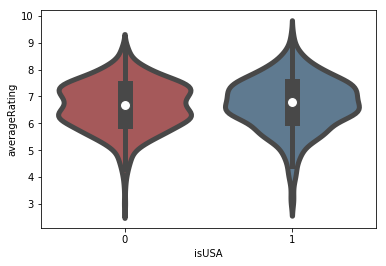

In [118]:
p2=sns.violinplot(x=oceny_imdb2['isUSA'], y=oceny_imdb2['averageRating'], palette=sns.color_palette("Set1", n_colors=8, desat=.5),inner='box' ,linewidth=5)

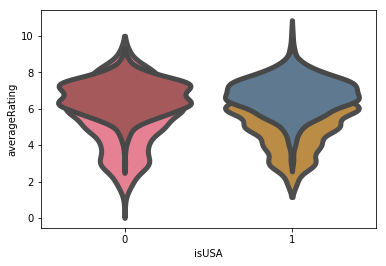

In [121]:
p1=sns.violinplot(x=oceny_imdb2['isUSA'], y=oceny_imdb2['Ocena'], palette=sns.color_palette("husl", 8), inner=None ,linewidth=5)
p2=sns.violinplot(x=oceny_imdb2['isUSA'], y=oceny_imdb2['averageRating'], palette=sns.color_palette("Set1", n_colors=8, desat=.5), inner=None ,linewidth=5)

In [123]:
oceny_imdb2[['isUSA', 'Ocena', 'averageRating']].groupby('isUSA').agg(['mean','max','min'])

Ocena         averageRating          
           mean max min          mean  max  min
isUSA                                          
0      5.722707   9   1      6.655240  8.8  3.0
1      5.685805  10   2      6.727432  9.3  3.1

Porównanie rozkładów Ocen z filmweb i średniej użytkowników <br> 
Patrz dystrybuantę dla OCeny wyżej. Widać, że kształt jest zachowany chodź minimalnie zniwelowany w zależnosci od gatunku

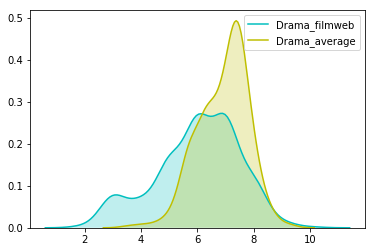

In [130]:
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Drama']['Ocena'], shade=True, color='c', label='Drama_filmweb')
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Drama']['averageRating'], shade=True, color='y', label='Drama_average')

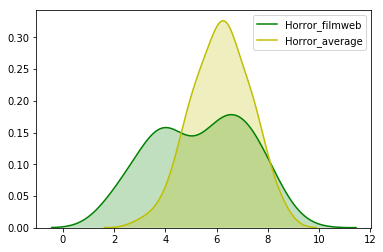

In [134]:
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Horror']['Ocena'], shade=True, color='g', label='Horror_filmweb')
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Horror']['averageRating'], shade=True, color='y', label='Horror_average')

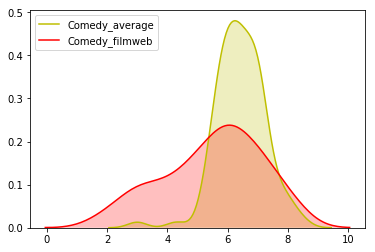

In [133]:
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Comedy']['averageRating'], shade=True, color='y', label='Comedy_average')
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Comedy']['Ocena'], shade=True, color='r', label='Comedy_filmweb')

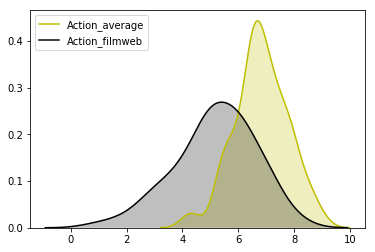

In [131]:
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Action']['averageRating'], shade=True, color='y', label='Action_average')
p1=sns.kdeplot(oceny_imdb2[oceny_imdb2.Map_right=='Action']['Ocena'], shade=True, color='black', label='Action_filmweb')